# <font color = 'brown'> Problem Statement</font>

#### The sinking of the Titanic is one of the most infamous shipwrecks in history.

- On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

- While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

- In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

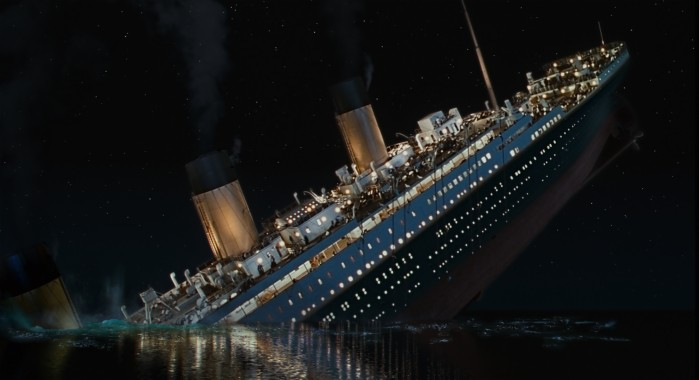

# <font color = 'brown'>Exploratory Data Analysis </font> 

1. It is  gaining intution about the data.
2. It entails conducting sanity checks meaning identifying the data collection startegy is correct and insights from the dataset are actually coming from right dataset or not.
3. It also helps to find missing values and outliers(extreme values) are present in the dataset or not.
4. It is also about summarizing the data using data visualization and statistical techniques to provide right insights.

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
# Reading the train dataset
df = pd.read_csv('train.csv')

In [3]:
# First 5 instances of the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Shape of the data
df.shape

(891, 12)

In [5]:
# size of the data
df.size

10692

In [6]:
# Columns in the dataset
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
# Variable identification
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
# Typecasting to category

# Survived should be categorical variable where 0 = No, 1=Yes
df['Survived'] = df['Survived'].astype('category')

# Pclass should be a ctegorical variable it describes socio-economic status 1st:Upper, 2nd:Middle, 3rd:Lower
df['Pclass'] = df['Pclass'].astype('category')

# Sex should be categorical variable
df['Sex'] = df['Sex'].astype('category')

# Embarked should be a categorical variable
df['Embarked'] = df['Embarked'].astype('category')

In [9]:
df.dtypes

PassengerId       int64
Survived       category
Pclass         category
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked       category
dtype: object

In [10]:
# Typecasting to category
df['Name'] = df['Name'].astype('category')
df['Cabin'] = df['Cabin'].astype('category')

In [11]:
df.dtypes

PassengerId       int64
Survived       category
Pclass         category
Name           category
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin          category
Embarked       category
dtype: object

##### <font color='green'> Univariate Analysis </font>

In [12]:
# Numerical Variables
df.select_dtypes(include =['int64','Int64']).dtypes

PassengerId    int64
SibSp          int64
Parch          int64
dtype: object

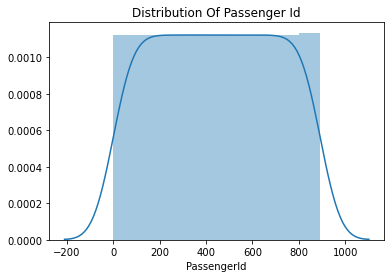

In [13]:
sb.distplot(df['PassengerId'])
plt.title('Distribution Of Passenger Id')
plt.show()

- Summary:
    - We can see it is unformly distributed,unique identification for each customer and not needed for further analysis.

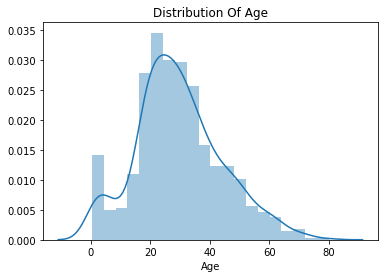

In [14]:
sb.distplot(df['Age'])
plt.title('Distribution Of Age')
plt.show()

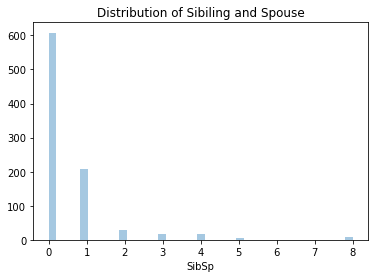

In [15]:
sb.distplot(df['SibSp'],kde=False)
plt.title('Distribution of Sibiling and Spouse')
plt.show()

- Summary:
     - Most of the passengers travelled without Sibiling and Spouse but we can't say they were travelling alone as mistresses and            fiances were ignored.

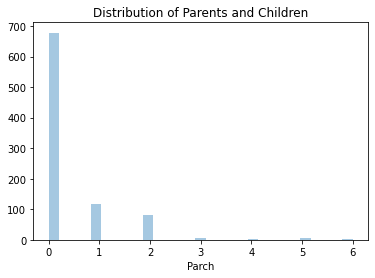

In [16]:
sb.distplot(df['Parch'],kde=False)
plt.title('Distribution of Parents and Children')
plt.show()

- Summary
    - Most of the passengers either travelled with only nanny else alone

In [17]:
# categorical variables
df.select_dtypes(include='category').dtypes

Survived    category
Pclass      category
Name        category
Sex         category
Cabin       category
Embarked    category
dtype: object

In [18]:
cat = ['Sex','Survived','Pclass','Embarked']

In [19]:
def UVA_cat(df,cat):
    size = len(cat)
    plt.figure(figsize=(4*size,5),dpi=100)
    
    for j,i in enumerate(cat):
        n_count = df[i].value_counts()
        n_uniq = df[i].nunique()
        
        plt.subplot(1,size,j+1)
        sb.barplot(n_count,n_count.index,order=n_count.index)
        plt.xlabel('Frequency',fontsize=20)
        plt.ylabel(f'{i}',fontsize=20)
        plt.title(f'unique categories: {n_uniq}\n Frequency: {n_count}\n Percentage: {df[i].value_counts(normalize=True)}')
    

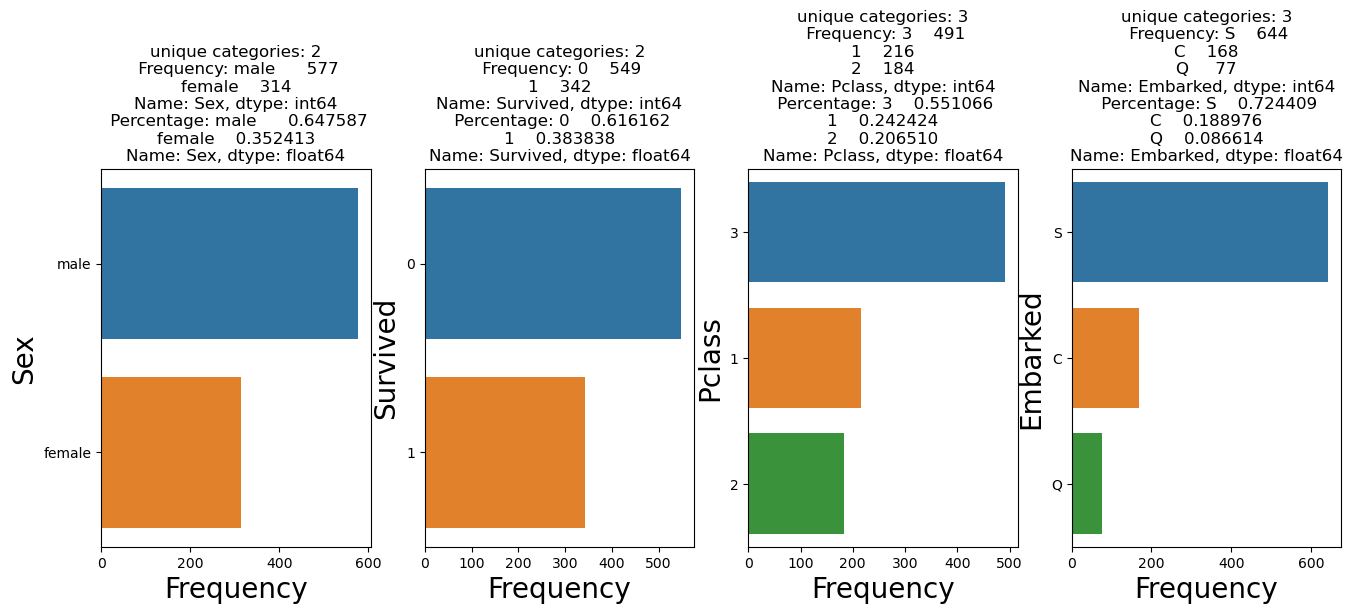

In [20]:
UVA_cat(df,cat)

- Summary:
    - There are more number of male passengers onboard.
    - 55% passnegers who travelled belong to socio-economic status : lower.
    - Most of the passengers boarded at Southampton and very few people in Queenstown.

##### <font color='green'>Bivariate Analysis</font>

In [21]:
def chisquare_test(df,cat,tar):
    '''
    Null Hypothesis : There is no relationship between two variables.
    Alternative Hypothesis : There is a significant relationship between two variables.
    '''
    table = pd.crosstab(df[tar],df[cat],)
    f_obs = np.array([table.iloc[0][:].values,table.iloc[1][:].values])
    from scipy.stats import chi2_contingency
    chi,p,dof,expected = chi2_contingency(f_obs)
    print(f'chi : {chi}\n P: {round(p,8)}\n expected:{expected}\n')
    if p < 0.05:
        print('Significant relationship between the categorical variables')
    else:
        print('No Significant relationship between the categorical variables')

### 1. Are Male Passengers less likely to survive ?

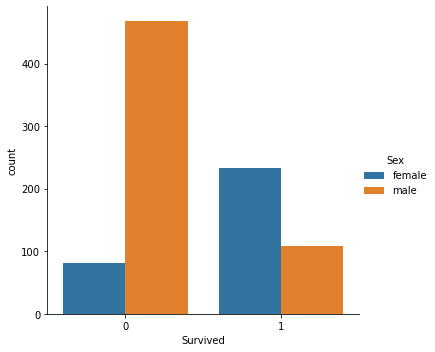

In [22]:
sb.catplot(x='Survived',hue='Sex',kind='count',data=df)

In [23]:
table =pd.crosstab(df['Survived'],df['Sex'],)
table

Sex,female,male
Survived,,
0,81,468
1,233,109


In [24]:
chisquare_test(df,cat='Sex',tar='Survived')

chi : 260.71702016732104
 P: 0.0
 expected:[[193.47474747 355.52525253]
 [120.52525253 221.47474747]]

Significant relationship between the categorical variables


- Summary:
    - So from the plot we can see that passengers who died more are male.

### 2. People who belong to socio-economic status: lower  are less likely to survive? 

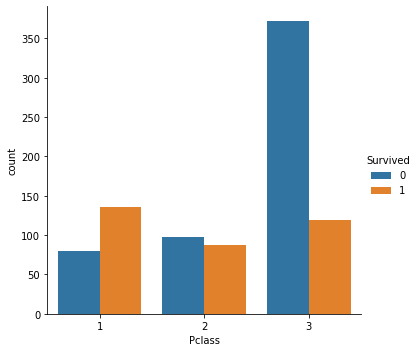

In [25]:
sb.catplot(x='Pclass',hue='Survived',kind='count',data=df)

In [26]:
pd.crosstab(df['Survived'],df['Pclass'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [27]:
chisquare_test(df,cat='Pclass',tar='Survived')

chi : 102.88898875696056
 P: 0.0
 expected:[[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]

Significant relationship between the categorical variables


- Summary:
    - From the plot we can see that most of the passengers who died belong to Lower Class.
    - Most of the people who survived belong to Upper Class. 

### 3. People who boarded at Southampton are less likely to survive ?

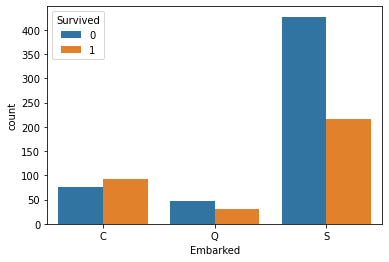

In [28]:
sb.countplot(df['Embarked'],hue=df['Survived'])

In [29]:
pd.crosstab(df['Survived'],df['Embarked'])

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [30]:
chisquare_test(df,cat='Embarked',tar='Survived')

chi : 26.48914983923762
 P: 1.77e-06
 expected:[[103.7480315  47.5511811 397.7007874]
 [ 64.2519685  29.4488189 246.2992126]]

Significant relationship between the categorical variables


- Summary:
    - Most of the passengers who died boarded titanic at southampton. 

### 4. Are Adult passengers less likely to survive ?

In [31]:
data = df[['Survived','Age']]
data['age_group'] = None
data['age_group'][data['Age']>=80] = 'Very Old'
data['age_group'][(data['Age']<80) & (data['Age']>=60)] = 'Senior Citizen'
data['age_group'][(data['Age']<60) & (data['Age']>=18)] = 'Adult'
data['age_group'][data['Age']<18] = 'Young'

<ipython-input-31-89a284041d42>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age_group'] = None
<ipython-input-31-89a284041d42>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age_group'][data['Age']>=80] = 'Very Old'
C:\Users\ravii\Conda3\lib\site-packages\pandas\core\generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
<

In [32]:
pd.crosstab(data['Survived'],data['age_group'])

age_group,Adult,Senior Citizen,Very Old,Young
Survived,,,,
0,353,19,0,52
1,222,6,1,61


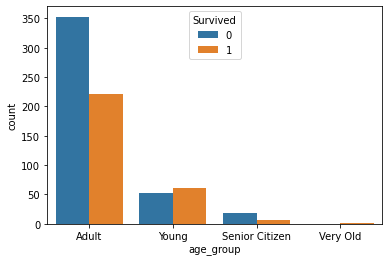

In [33]:
sb.countplot(data['age_group'],hue=data['Survived'])

In [34]:
chisquare_test(data,'age_group','Survived')

chi : 13.654510402504544
 P: 0.00341521
 expected:[[341.45658263  14.84593838   0.59383754  67.10364146]
 [233.54341737  10.15406162   0.40616246  45.89635854]]

Significant relationship between the categorical variables


- Summary:
    - Passengers who are adults are the ones who didn't survive the most.

### 5. Are Passengers travelling alone / with mistresses or fiance less likely to survive ?

In [35]:
ds = df[['Survived','SibSp']]
ds['SibSp_cat'] = " "
ds['SibSp_cat'][df['SibSp']==0] = 'Travelling Alone/Mistresses/Fiance'
ds['SibSp_cat'][df['SibSp']==1] = 'Travelling with one person (sibiling/spouse)'
ds['SibSp_cat'][df['SibSp']==2] = 'Travelling with two person (sibiling/spouse)'
ds['SibSp_cat'][df['SibSp']>=3] = 'Travelling with three or more than 3 persons (sibilings/spouse)'

<ipython-input-35-42a4fcf69018>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['SibSp_cat'] = " "
<ipython-input-35-42a4fcf69018>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds['SibSp_cat'][df['SibSp']==0] = 'Travelling Alone/Mistresses/Fiance'
C:\Users\ravii\Conda3\lib\site-packages\pandas\core\generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

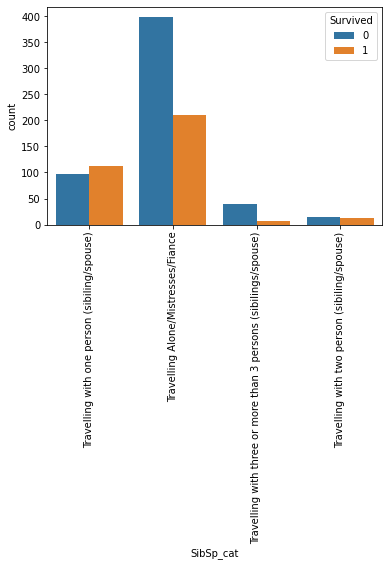

In [36]:
sb.countplot(ds['SibSp_cat'],hue=ds['Survived'])
plt.xticks(rotation=90)

In [37]:
chisquare_test(ds,'SibSp','Survived')

chi : 37.27179291520431
 P: 1.56e-06
 expected:[[374.62626263 128.77777778  17.25252525   9.85858586  11.09090909
    3.08080808   4.31313131]
 [233.37373737  80.22222222  10.74747475   6.14141414   6.90909091
    1.91919192   2.68686869]]

Significant relationship between the categorical variables


- Summary:
    - Most of the passengers who travelled Alone/ with Mistresses or Fiance are the ones who died more.

### 6. Are Passengers travelling alone / with nanny less likely to survive ?

In [38]:
dp = df[['Survived','Parch']]
dp['Parch_cat'] = " "
dp['Parch_cat'][df['SibSp']==0] = 'Travelling Alone/Nanny'
dp['Parch_cat'][df['SibSp']==1] = 'Travelling with one person'
dp['Parch_cat'][df['SibSp']==2] = 'Travelling with two person'
dp['Parch_cat'][df['SibSp']>=3] = 'Travelling with three or more than 3 persons'

<ipython-input-38-d4f80a671e62>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp['Parch_cat'] = " "
<ipython-input-38-d4f80a671e62>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp['Parch_cat'][df['SibSp']==0] = 'Travelling Alone/Nanny'
<ipython-input-38-d4f80a671e62>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp['Parch_cat'][df['SibSp']==1] = 'Travelling with one per

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

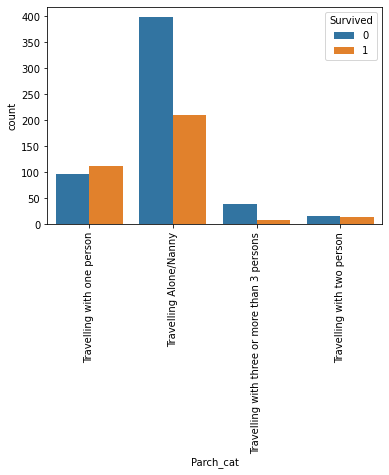

In [39]:
sb.countplot(dp['Parch_cat'],hue=dp['Survived'])
plt.xticks(rotation=90)

In [40]:
chisquare_test(dp,'Parch_cat','Survived')

chi : 35.433439011914366
 P: 1e-07
 expected:[[374.62626263 128.77777778  28.34343434  17.25252525]
 [233.37373737  80.22222222  17.65656566  10.74747475]]

Significant relationship between the categorical variables


- Summary:
    - Most of the passengers who travelled Alone/ with nanny are the ones who died more.